# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [10]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [11]:
fitbit = pd.read_csv('../data/Fitbit2.csv') # Se descarga para lectura el csv y se mira por encima con un head
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 


Cómo cambia el promedio de pasos por mes. Utilice la visualización adecuada para mostrar los pasos medios por mes. ¿Fitbitter es más activo los fines de semana o los días laborables?

Sugerencias:

* Utilice las columnas Months_encoded y Week_or Weekend.
* Utilice la API orientada a objetos matplolib.pyplot.
* Establece tu figura de talla en 12,4
* Explora plt.sca
* Explora plt.xticks
* Guarde sus figuras en una carpeta llamada figuras en su repositorio.

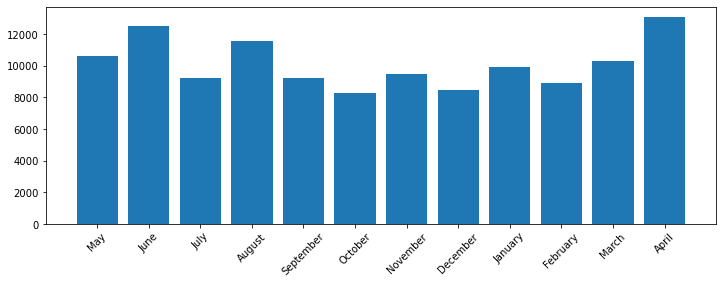

In [12]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
average_month=pd.DataFrame(fitbit.groupby(['Months'])['Steps'].apply(list), columns=['Steps']).T.sum() 
means_month=[np.mean(average_month[e]) for e in fitbit['Months'].unique()]
plt.figure(figsize=(12, 4)) #pongo la figura al tamaño deseado
plt.xticks(rotation=45) # Hago una rotación de 45º a las etiquetas del eje x
plt.bar([e for e in fitbit['Months'].unique()], means_month) # itero dentro de la columna Months ¿Resultados unicos? means month¿?
plt.savefig('avg_month.jpg') #guardo la figura en formato jpg

The average steps per month seems to be quite stable the whole year. Perhaps we can appreciate a slight decrease in activity during the autumn and winter months, and in July.

([<matplotlib.axis.XTick at 0x7f30c2ede850>,
 [Text(0, 0, 'weekend'), Text(1, 0, 'work')])

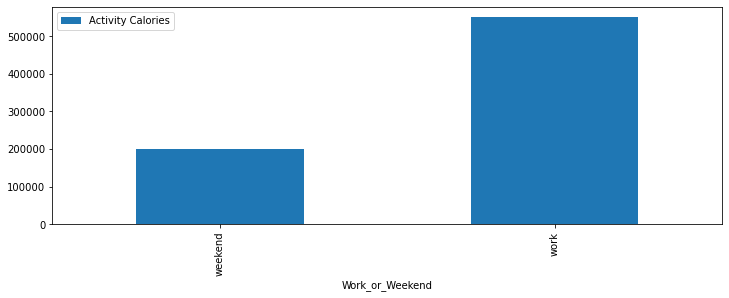

In [13]:
fitbit.groupby("Work_or_Weekend").agg({"Activity Calories":"sum"}).plot.bar(figsize=(12,4)) #agrupo la columna work_or_weekend
plt.xticks(np.arange(2),("weekend","work")) # pongo etiquetas al eje x weekend y work

In this case is very obvious that this person has a lot more activity during workdays, and tha ton weekends prefers to relax.

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

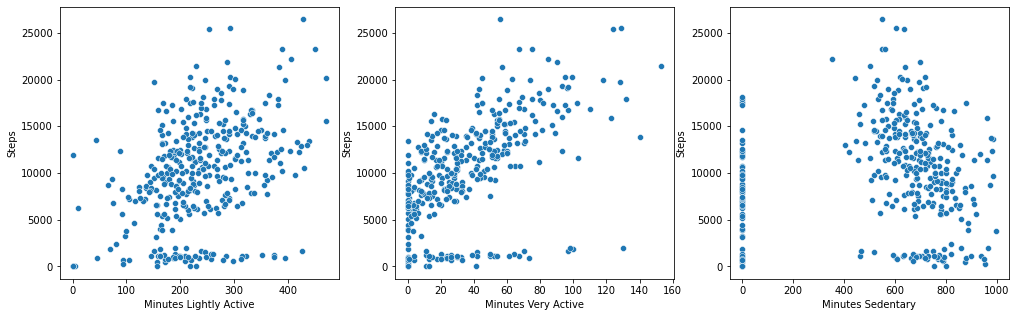

In [14]:
cosas = ["Minutes Lightly Active","Minutes Very Active","Minutes Sedentary"] #se hace una lista con los 3 tipos de personas
plt.figure(figsize=(17,5)) #se selecciona un tamaño para la fig
for range in np.arange(3): # ?¿???
    plt.subplot(1,3,range+1)
    sns.scatterplot(x=cosas[range], y="Steps",data=fitbit)

If we compare the relation between this three variables and the number of steps, we can see that if both "min lightly active" and "min very activate" increases, the number of steps increases too. This is more obvious in the case of the "very active" scenario. 

On the other side, if we have a look at the "minutes sedentary" plot, we can't see any correlation between it and the steps per day.

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [15]:
titanic = pd.read_csv('../data/titanic.csv',low_memory=False)
titanic.head() #descargo csv y lo miro por encima

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [16]:
titanic.dtypes #miro los tipos de dato que hay en el df, son 3: int(entero),float(decimal) y object que es string

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [17]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(exclude=['int','float']).dtypes #miro los tipos de datos quitando a los int y los float, me quedan solo los object.

Name        object
Gender      object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [18]:
# NUMERICAL VARIABLES
titanic.select_dtypes(exclude=object).dtypes #ahora al revés, de los 3 tipos de dato que tengo quito los object para quedarme con las variables numericas

PassengerId      int64
Survived       float64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [19]:
for i in titanic.select_dtypes(exclude=object): #Aquí itero a través de las variables que no son objeto
    print ("----------"+i+"------------")# se imprime cada una de las variables
    print (len(titanic[i].unique()),f"/{len(titanic)}") #¿?

----------PassengerId------------
1309 /1309
----------Survived------------
3 /1309
----------Pclass------------
3 /1309
----------Age------------
193 /1309
----------SibSp------------
7 /1309
----------Parch------------
8 /1309
----------Fare------------
281 /1309


Looking at the dtypes of the data frame we can infer which are the numerical and categorical variables, but if we look at the columns in depth we can see that the column, **Pclass** is actually categorical because it has only 3 unique values which are the class where the passenger travels, so it's definitely a category.

We could infer, that **SibSp** and **Parch** are categorical too, since they only have 7 and 8 unique values respectively.

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [20]:
# Plot style change
plt.style.use('classic')   # parametros como el color y el tipo de cuadricula para matplotlib
sns.set_style('whitegrid') # parametros como el color yel tipo de cuadricula para...seaborn

# Figure size change
plt.rcParams['figure.figsize'] = (12, 6) # Tamañano en Matplotlib de la figura

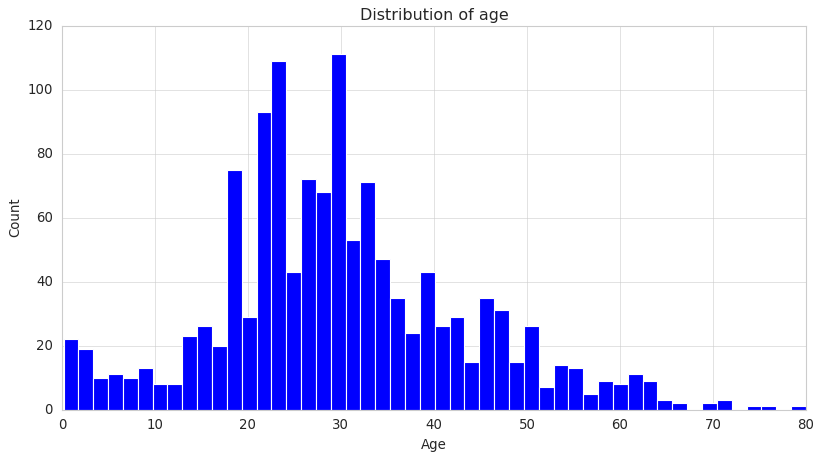

In [21]:
# Matplotlib
titanic['Age'].hist(bins=50) #cojo solo la columna de edad y pongo el tamaño de las cajas en 50 en Matplotlib
# Set titles, labels, etc
plt.title('Distribution of age') #titulo del histograma
plt.xlabel('Age') # eje x nombrado con Edad
plt.ylabel('Count') # eje y nombrado con cantidad

# Show the plot
plt.show() #para enseñar la figura creada

<AxesSubplot:xlabel='Age', ylabel='Count'>

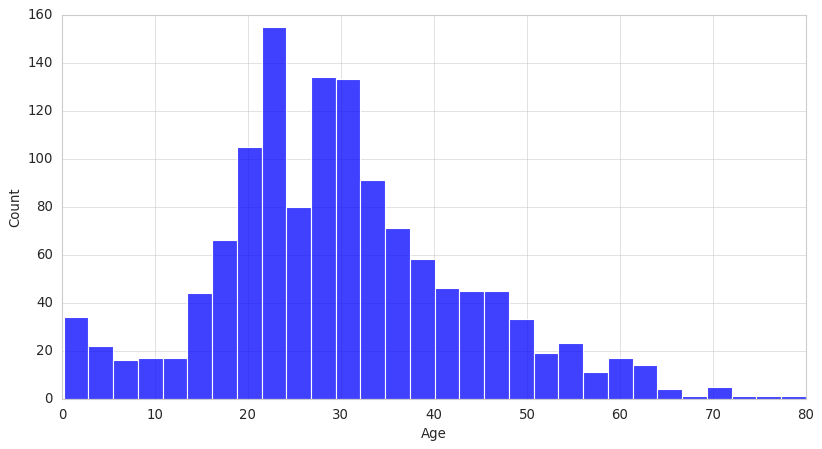

In [22]:
sns.histplot(titanic, x="Age") # igual pero mas sencillo con seaborn

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

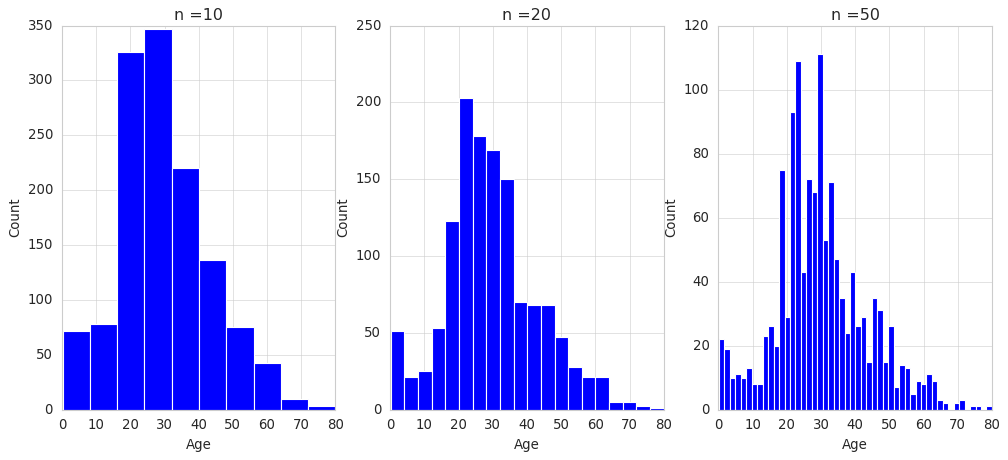

In [23]:
# Variables
bins = [10, 20, 50] #elijo el tamaño de las cajas que tendran las diferentes edades

# Creo tres subplots
f, ax = plt.subplots(1,3)
f.set_figwidth(15) #anchura de la figura

#creo los tres subplots cada uno con una anchura de columna
for i,num in enumerate(bins): #?? 
    plt.sca(ax[i]) #?
    titanic['Age'].hist(bins=num)
    plt.title('n =' + str(num)) 
    plt.xlabel('Age')
    plt.ylabel('Count')

#### How does the bin size affect your plot?

Using a low number of bins (wider bins) reduces noise on the distribution estimation while using a 
high number of bins (narrower bins) gives greater precision to the distribution estimation (and more noise).

#### Use seaborn to show the distribution of column `Age`.

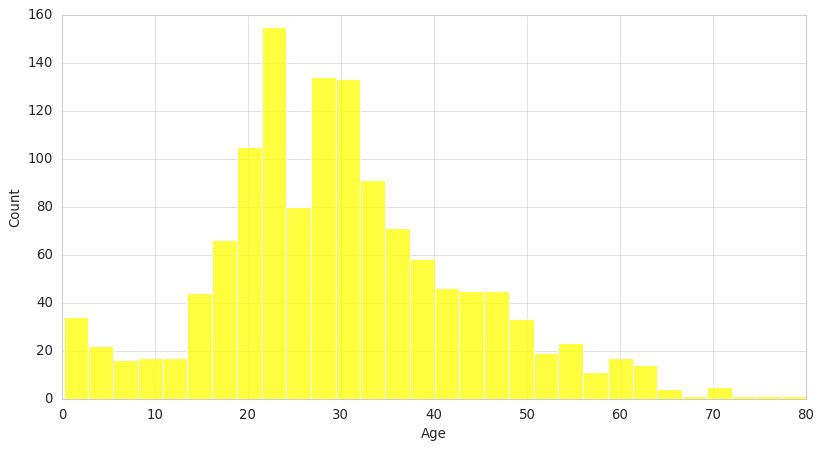

In [37]:


# Creo el histograma de edad usando seaborn utilizando la columna edad con tamaño 30 las cajas y color amarillo
sns.histplot(titanic['Age'], bins = 30, kde = False, color = 'yellow')


plt.show()    #enseño la grafica de matplotlib

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

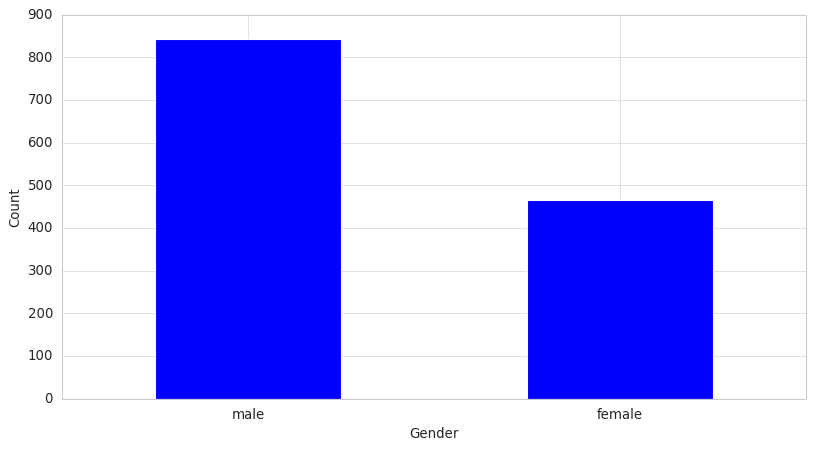

In [25]:
# grafico con Matplotlib

#grafico del genero de barras
titanic['Gender'].value_counts().plot(kind='bar')

# se añaden etiquetas de genero y numero y una rotacion de 0
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation = 0)

# muestro el grafico
plt.show()

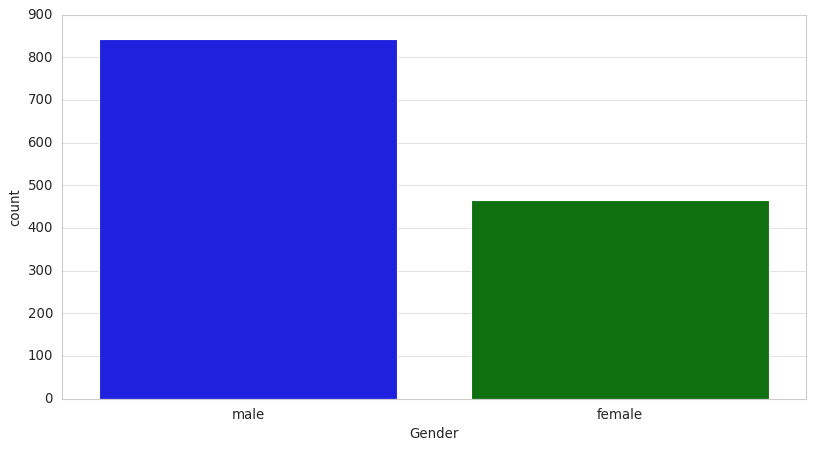

In [26]:
# ahora con Seaborn
sns.countplot(x ='Gender', data = titanic)

# para enseñar el grafico
plt.show()

**Now with a pie plot**

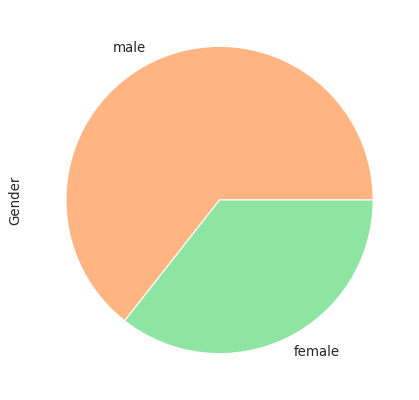

In [27]:
#defino el color ? 1:5 no lo entiendo
colors = sns.color_palette('pastel')[1:5]

# Bar plot of the gender
titanic['Gender'].value_counts().plot(kind='pie', colors=colors)

# Show the plot
plt.show()

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

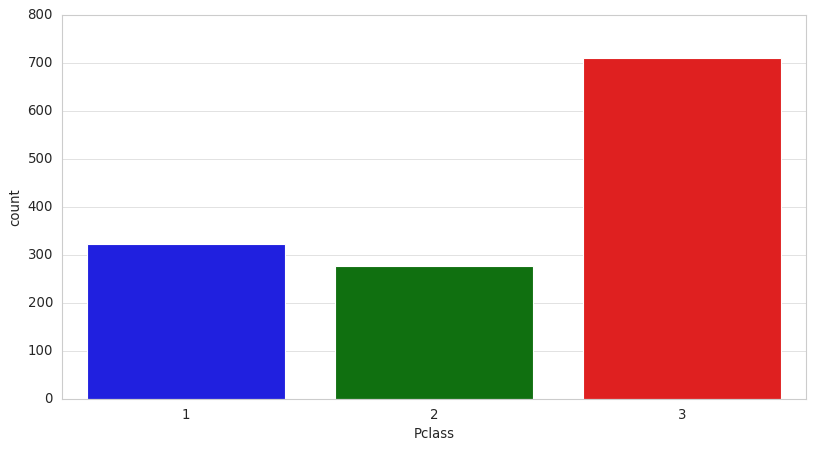

In [28]:
sns.countplot(x="Pclass",data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

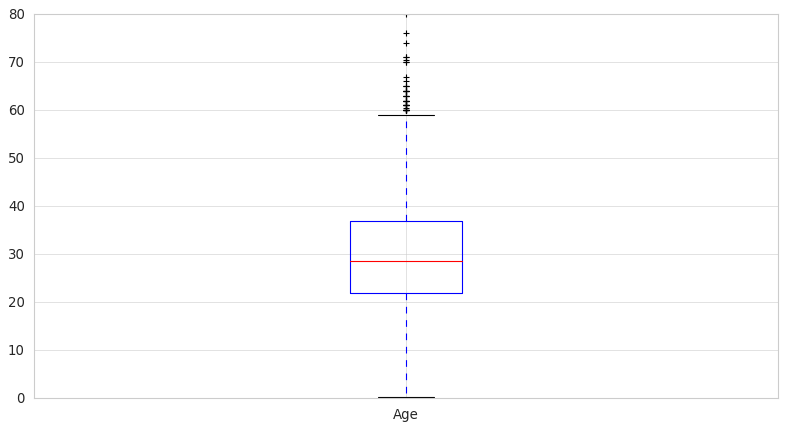

In [29]:
# grafico de cajas de la columna edad
titanic.boxplot(column='Age')

# Para enseñar el grafico
plt.show()

#### What does the last plot tell you about the feature `Age`?

The statistics that you can get from the boxplot are the minimum, first quartile, median, 
third quartile, and maximum.

The red line shows us the median of Age. 
The blue box shows us the interquartile range (from Q1 to Q3).
It also shows us the outliers, which are out of the maximum and minimum range (Q1 - 1.5*IQR, Q3 + 1.5*IQR).

In this specific case, we can say that:
1. The distribution of the age remains between 0 and 60 years, except for few elder outliers.
1. The median is a little less than 30 years.
1. The 50% of the people are between early twenties and almost 40. (IQR)

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

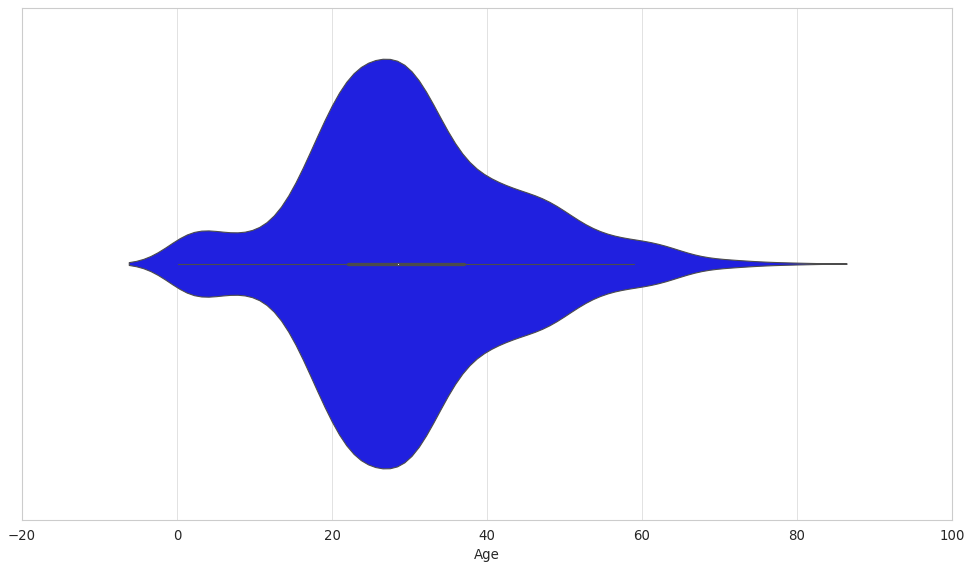

In [30]:
# Elijo el tamaño de la figura
plt.figure(figsize = (15,8))

#elijo un grafico de Violin
sns.violinplot(x = "Age", data = titanic)

# enseñar grafico
plt.show()

#### What additional information does the last plot provide about feature `Age`?

This plot is a combination of a boxplot and a density plot. The violin plot features a kernel density estimation 
of the underlying distribution of the data.

The black central part of the plot is the same as a boxplot and the white dot is the median.
The blue part is the distribution of the data.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

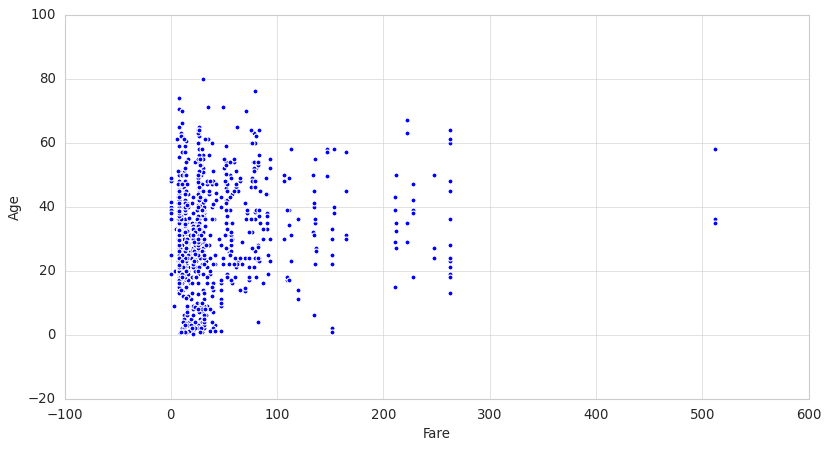

In [31]:
# Method 1 - matplotlib
# grafico de dispersión con las columnas edad y pasaje
plt.scatter(titanic['Fare'], titanic['Age'])

# para añadir etiquetas
plt.xlabel('Fare')
plt.ylabel('Age')

# ver el grafico
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Age'>

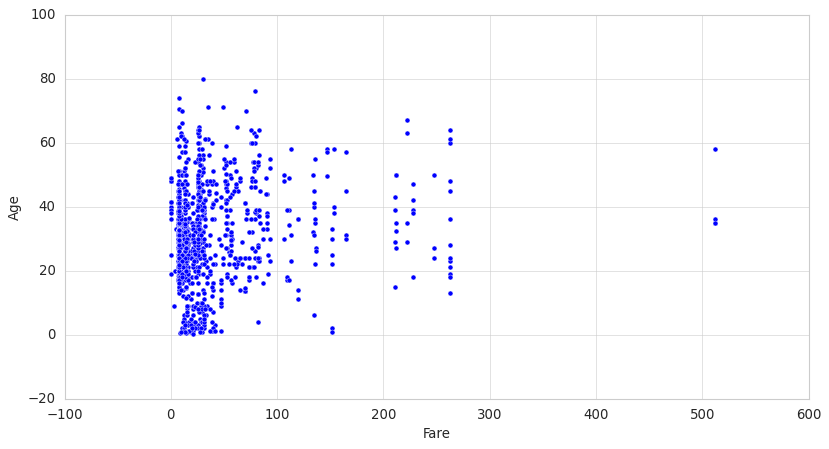

In [32]:
# Metodo - seaborn
# Grafico de dispersion con el eje x de tarifa y la columna edad eje y
sns.scatterplot(x = titanic['Fare'], y = titanic['Age'])

#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

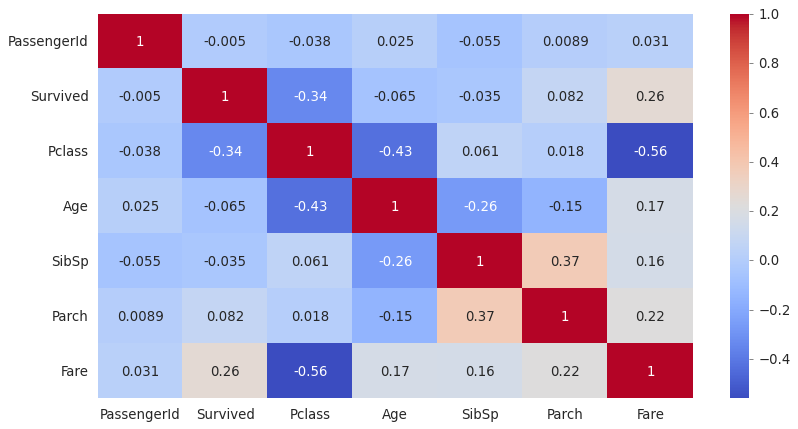

In [36]:
# matriz de correlacion de mapa de calor, annot es para q se vean los numeros
sns.heatmap(titanic.corr(), cmap='coolwarm', annot=True)

#### What are the most correlated features?

The most correlated columns are Pclass and Fare (which make sense). But it's a negative correlation, when PClass increases, Fare descreases, this is quite obviuos since first class is the most luxurius.

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

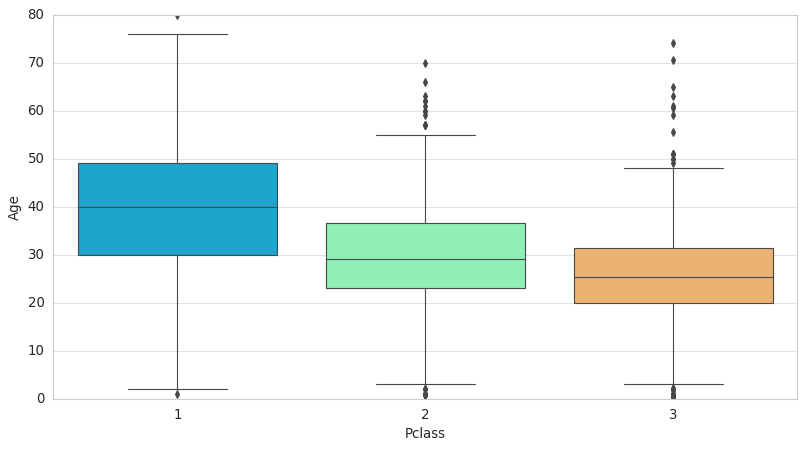

In [34]:
# creo un grafico cajas
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='rainbow');

We can see that the the mean age is lower when the class is worse.But the minimun values doesn't change. This is because, as we can see, the range of ages in the better classes is wider than in the wors ones.

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

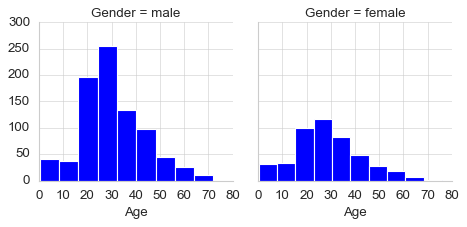

In [26]:
# Creo una cuadricula al grafico usando FacetGrid
g = sns.FacetGrid(data = titanic, col = 'Gender')
# se dibuja un grafico para los dos generos
g.map(plt.hist, 'Age')
# enseño el grafico
plt.show()

If we have a look at this plots we can say that regarding people in their 20s, 30s , 40s there are a lot more men. We must notice that in these register we have people from the crew.